# ***ATIVIDADE AULA 04***

## Grupo Nº (Coloque aqui o número do seu grupo)

## Integrantes:
*   Matrícula e nome completo
*   Matrícula e nome completo
*   Matrícula e nome completo




### Indique aqui o número nome do seu **dataset**

In [19]:
# Importando algumas bibliotecas
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [20]:
# Carregamento dos dados desde o computador
dados = pd.read_csv('pizza_sales.csv')
dados.head(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6.0,2.0,thai_ckn_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7.0,3.0,ital_supr_m,1.0,1/1/2015,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8.0,3.0,prsc_argla_l,1.0,1/1/2015,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9.0,4.0,ital_supr_m,1.0,1/1/2015,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10.0,5.0,ital_supr_m,1.0,1/1/2015,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [22]:
import json
with open('pizza-sales-dataset-metadata.json') as j:
    j = json.load(j)
    print(json.dumps(j,indent=4))

{
    "@context": {
        "@language": "en",
        "@vocab": "https://schema.org/",
        "citeAs": "cr:citeAs",
        "column": "cr:column",
        "conformsTo": "dct:conformsTo",
        "cr": "http://mlcommons.org/croissant/",
        "data": {
            "@id": "cr:data",
            "@type": "@json"
        },
        "dataBiases": "cr:dataBiases",
        "dataCollection": "cr:dataCollection",
        "dataType": {
            "@id": "cr:dataType",
            "@type": "@vocab"
        },
        "dct": "http://purl.org/dc/terms/",
        "extract": "cr:extract",
        "field": "cr:field",
        "fileProperty": "cr:fileProperty",
        "fileObject": "cr:fileObject",
        "fileSet": "cr:fileSet",
        "format": "cr:format",
        "includes": "cr:includes",
        "isEnumeration": "cr:isEnumeration",
        "isLiveDataset": "cr:isLiveDataset",
        "jsonPath": "cr:jsonPath",
        "key": "cr:key",
        "md5": "cr:md5",
        "parentField": "cr:p

### 1. Estabelecer o tipo de variável que cada coluna representa no dataset, isto é, se quantitativa discreta, qualitativa nominal, etc. Qual é o total de variáveis quantitativas e  qualitativas.

Abaixo estão listadas as colunas do dataset, e o que cada uma representa:

pizza_id - quantitativa discreta

order_id - quantitativa discreta

pizza_name_id - qualitativa nominal

quantity - quantitativa discreta

order_date - quantitativa discreta

order_time - quantitativa discreta

unit_price - quantitativa contínua

total_price - quantitativa contínua

pizza_size - qualitativa ordinal

pizza_category - qualitativa nominal

pizza_ingredients - qualitativa nominal

pizza_name - qualitativa nominal


In [46]:
dados = dados[['pizza_category', 'unit_price']]

# Variável qualitativa: pizza_category

# Variável quantitativa: unit_price
def analisa_categoria(dados):
    resultado = {}
    resultado["Média amostral"] = dados["unit_price"].mean()
    resultado["Mediana amostral"] = dados["unit_price"].median()
    resultado["Moda"] = dados["unit_price"].mode()
    resultado["Amplitude total"] = dados["unit_price"].max() - dados["unit_price"].min()
    resultado["Variância amostral"] = dados["unit_price"].var()
    resultado["Desvio padrão amostral"] = dados["unit_price"].std()
    resultado["Coeficiente de variação"] = dados["unit_price"].std() / dados["unit_price"].mean()
    resultado["Assimetria"] = dados["unit_price"].skew()
    resultado["Curtose"] = dados["unit_price"].kurtosis()
    resultado["Quartil Inferior"] = dados['unit_price'].quantile(0.25)
    resultado["Quartil Superior"] = dados['unit_price'].quantile(0.75)

    analises = pd.DataFrame(resultado)
    return analises

for c in dados['pizza_category'].unique():
    print("Análise em ",c+":")
    print(analisa_categoria(dados[dados['pizza_category'] == c]))
    print("\n\n\n")

Análise em  Classic:
   Média amostral  Mediana amostral  Moda  Amplitude total  \
0        14.79749             13.25  12.0             26.2   

   Variância amostral  Desvio padrão amostral  Coeficiente de variação  \
0           15.697584                3.962018                 0.267749   

   Assimetria   Curtose  Quartil Inferior  Quartil Superior  
0    1.124616  1.477734              12.0              16.5  




Análise em  Veggie:
   Média amostral  Mediana amostral  Moda  Amplitude total  \
0       16.612639             16.75  16.0              9.0   

   Variância amostral  Desvio padrão amostral  Coeficiente de variação  \
0            8.681858                2.946499                 0.177365   

   Assimetria   Curtose  Quartil Inferior  Quartil Superior  
0   -0.297566 -1.127123             14.75              18.5  




Análise em  Supreme:
   Média amostral  Mediana amostral   Moda  Amplitude total  \
0       17.363229              16.5  20.75             11.4   

   Vari

### Analises sobre as informações de cada categoria:

- Classic são as pizzas mais baratas em média

- Chicken é a mais cara

- Classic é a que tem mais amplitude e coeficiente de variação, ou seja, pizzas tanto mais caras e mais baratas

- Classic tem uma grande assimetria positiva, ou seja, é comum que o preço esteja abaixo da média, mas tendo casos onde o preço é significativamente maior



In [29]:
price_counts = dados.groupby(['pizza_category', 'unit_price']).size().reset_index(name='count')

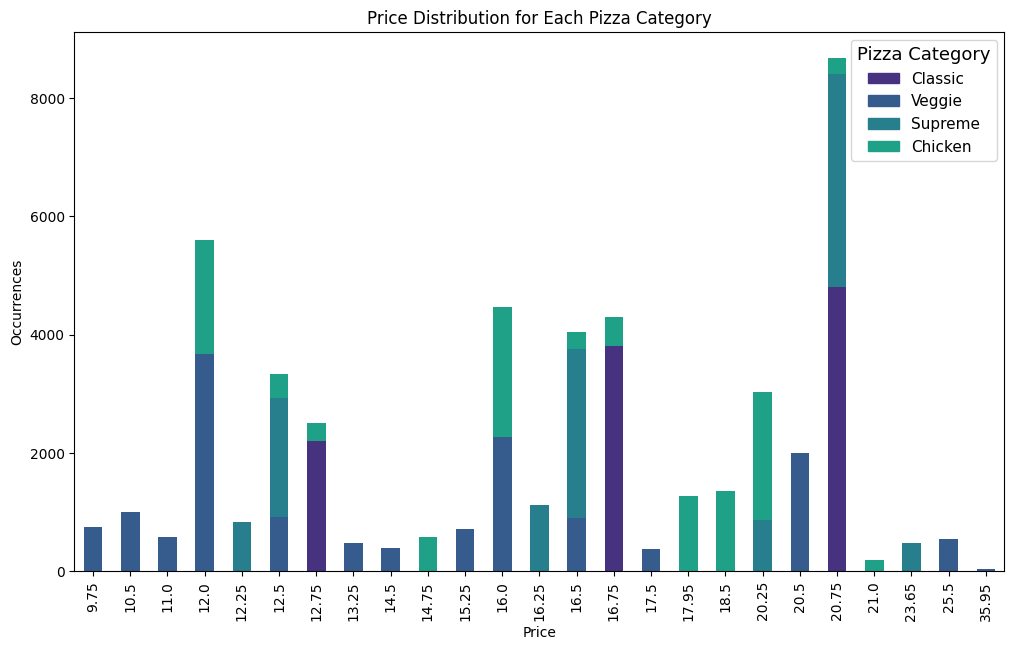

In [37]:

pivot_table = price_counts.pivot(index='unit_price', columns='pizza_category', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

palette = sns.color_palette('viridis', as_cmap=False)
categories = dados['pizza_category'].unique()

# Create handles for the legend
handles = [patches.Patch(color=palette[i], label=cat) for i, cat in enumerate(categories)]
# Create stacked bar plot
pivot_table.plot(kind='bar', stacked=True, ax=ax, color= palette)
plt.xlabel('Price')
plt.ylabel('Occurrences')
plt.title('Price Distribution for Each Pizza Category')


# Add legend to the plot
plt.legend(handles=handles, title='Pizza Category', title_fontsize='13', fontsize='11')
plt.show()

Achei muito bonito e interessante o fato que existem preços que só são atingidos por uma categoria de pizza